In [1]:
HD_BET_path="/app/Codebase/gustavo_script/Preprocessing/Skull_stripp/dgx/HD-BET/"
%cd $HD_BET_path
%pip install -e .

/app/Codebase/gustavo_script/Preprocessing/Skull_stripp/dgx/HD-BET


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Obtaining file:///app/Codebase/gustavo_script/Preprocessing/Skull_stripp/dgx/HD-BET
  Preparing metadata (setup.py) ... done
  Running setup.py develop for HD-BET

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
INFO: pip is looking at multiple versions of reorient-nii to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 1.7 MB/s eta 0:00:00 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.1 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 664.8 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 23.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 146.6 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 5.3.2
    Uninstalling nibabel-5.3.2:
      Successfully uninstalled nibabel-5.3.2

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import glob
from antspy_pp_utils import *
from custom_pipelines import *

# Atlas registration (SyN)

In [12]:
# T1 - Atlas registration
root_path='/app/Data/_Brain/Radiology/_Adult/_Glioma/'
mri_data='IU_Primary_Brain_Tumor'
subdir='Preprocessed'
out_subdir='Preprocessed'

time_point='Baseline'
mri_mod='T1c'
ext='.nii.gz'
pipeline='SkullS_BiasC'
mask_str='tumor_seg_swinUNETR'
brainmask_str='SkullS_mask'
file_xlsx_list='UI_QC.xlsx'
atlas_str='MNI'

# Specify ANTs parameters
aff_metric = "mattes"
type_of_transform = "Affine"
transforming_mask=True
SkullStripp=None # HD_BET or Atlas_mask Default= None

# Atlas
atlas_path='/app/Codebase/gustavo_script/_Neuroimaging/Preprocessing/ATLAS_T1/MNI152_T1_1mm_182_218_182/MNI152_T1_1mm_brain.nii.gz'

In [3]:
labels, imgs = getting_T1_mask_list(root_path, mri_data,subdir,time_point,mri_mod,pipeline,ext,mask_str)

main_path /app/Data/_Brain/Radiology/_Adult/_Glioma/IU_Primary_Brain_Tumor/Preprocessed/*/Baseline/*T1c_SkullS_BiasC.nii.gz

 number of MRI scans: 110 , for MRI modality: T1c

 number of segmentation files: 105


In [13]:
imgs= getting_images_list_from_csv(root_path,mri_data,subdir,mri_mod,pipeline,file_xlsx_list)
imgs[-1]


 number of images files: 61, for MRI modality: T1c, from : /app/Data/_Brain/Radiology/_Adult/_Glioma/IU_Primary_Brain_Tumor/Metadata/UI_QC.xlsx 


'/app/Data/_Brain/Radiology/_Adult/_Glioma/IU_Primary_Brain_Tumor/Preprocessed/0355/Baseline/0355_T1c_SkullS_BiasC.nii.gz'

In [ ]:
for im in list(imgs[:]):
    label=im.replace(pipeline, mask_str)
    label=label.replace("_"+mri_mod,"")
    neg_lesion_path=getting_neg_mask(label, label_range=[1,5])
    InverseWrap_registration(im, label, atlas_path, brainmask_str, pipeline, neg_mask=neg_lesion_path)


Saved negative lesion image to /app/Data/_Brain/Radiology/_Adult/_Glioma/IU_Primary_Brain_Tumor/Preprocessed/0003/Baseline/Neg_Lesion.nii.gz

>>> registering 0003_T1c_SkullS_BiasC.nii.gz to MNI152_T1_1mm_brain.nii.gz, brain mask 0003_T1c_SkullS_mask.nii.gz
antsRegistration -d 3 -r [0x7faebacd5bc8,0x7faebc5f92c8,1] -m mattes[0x7faebacd5bc8,0x7faebc5f92c8,1,32,regular,0.2] -t Affine[0.25] -c 2100x1200x1200x0 -s 3x2x1x0 -f 4x2x2x1 -x [NA,NA] -m mattes[0x7faebacd5bc8,0x7faebc5f92c8,1,32] -t SyN[0.250000,3.000000,0.000000] -c [100x100x100x20,1e-7,8] -s 3x2x1x0 -f 8x4x2x1 -u 1 -z 1 -o [/tmp/tmprabf01dl,0x7faebacd61a8,0x7faebacd5908] -x [0x7faebacd6b28,NA] --float 1 --write-composite-transform 0 -v 1
All_Command_lines_OK
Using single precision for computations.
The composite transform comprises the following transforms (in order): 
  1. Center of mass alignment using fixed image: 0x7faebacd5bc8 and moving image: 0x7faebc5f92c8 (type = Euler3DTransform)
  Reading mask(s).
    Registration sta

In [9]:
image=imgs[-1].replace("_"+pipeline,"")
image

'/app/Data/_Brain/Radiology/_Adult/_Glioma/IU_Primary_Brain_Tumor/Preprocessed/0355/Baseline/0355_T1c.nii.gz'

In [10]:
masked_im_path=SkullStrip_HD_Bet(image, cuda_device=0)
masked_im_path

Running SkullStripp 0355_T1c.nii.gz, HD-BET on cuda device 0


/usr/local/bin/hd-bet:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('HD-BET==1.0')



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /app/Data/_Brain/Radiology/_Adult/_Glioma/IU_Primary_Brain_Tumor/Preprocessed/0355/Baseline/0355_T1c.nii.gz
preprocessing...
image shape after preprocessing:  (117, 171, 171)
prediction (CNN id)...
0
1
2
3
4
running postprocessing... 
exporting segmentation...


'/app/Data/_Brain/Radiology/_Adult/_Glioma/IU_Primary_Brain_Tumor/Preprocessed/0355/Baseline/0355_T1c_SkullS.nii.gz'

# Co-registration, temporal registration

In [3]:
# Main dir
root_path = '/app/Data/_Brain/Radiology/_Adult/_Glioma/'
mri_data='LUMIERE'
subdir='Preprocessed'
out_subdir='Preprocessed'

# data filters
file_xlsx_list='1st_tumor_progression.csv'
df_key='progression_time_point'
time_filter=True

# modality / segmentation
mri_mod='CT1'
ext='.nii.gz'
mask_str='seg_mask'
mov_pipeline=None

# Template set up : Pre-op registration
PreOp_tp='Baseline'
ref_pipeline='SRI24'

# Template set up : Atlas path
atlas_str='SRI24'
atlas_path='/app/Codebase/gustavo_script/_Neuroimaging/Preprocessing/ATLAS_T1/'+ atlas_str +'/templates/T1_brain.nii'

# ANTs parameters

#mri_mapping="Forward_mapping"
#type_transform = "Affine"
mri_mapping = "InverseWarp_mapping"
type_transform = "SyN"
aff_metric = "mattes"

# Skull Stripp and N4 bias
transforming_mask=True
SkullStripp=None # HD_BET or Atlas_mask Default= None 

In [4]:
segs, mov_imgs, timepoints = getting_images_list_from_csv(root_path,mri_data,subdir,
                                                      mri_mod,file_xlsx_list,df_key,mask_str,
                                                      time_filtering=True, pipeline=mov_pipeline)
#timepoints


 number of images files: 69, segmentation files: 68 for MRI modality: CT1, from : /app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Metadata/LUMIERE_1st_tumor_progression.csv 


In [5]:
_, ref_imgs, _ = getting_images_list_from_csv(root_path,mri_data,subdir,
                                                    mri_mod,file_xlsx_list,df_key,mask_str,
                                                    ID_filtering=True, time_point=PreOp_tp, pipeline=ref_pipeline)


 number of images files: 69, segmentation files: 0 for MRI modality: CT1, from : /app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Metadata/LUMIERE_1st_tumor_progression.csv 


## atlas registration

In [ ]:
for seg_path in list(segs[0:10]):
    try:
        id_label, mov_im, _ = Pairing_Label_mri(seg_path, imgs, mri_mod)
        
        if not len(mri_idx)==0:
            neg_lesion_path=getting_neg_mask(seg_path, label_range=[1,5])

            registered_mri= mri_coregistration(mov_im,ext,type_transform,aff_metric,subdir,out_subdir,
                                                atlas_path=atlas_path, atlas_str=atlas_str, neg_mask=neg_lesion_path,
                                                im_seg=seg_path, brainmask=None, mapping=mri_mapping)
            
            
            
    except Exception as e:
        
        continue
    


Patient ID: .. Patient-001
MRI scan: .. /app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Preprocessed/Patient-001/time_point_03/Patient-001_CT1.nii.gz

Saved negative lesion image to /app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Preprocessed/Patient-001/time_point_03/Neg_Lesion.nii.gz

 >>>>>>> ... mri_coregistration SRI24 

 case ID Patient-001  moving image Patient-001_CT1.nii.gz reference T1_brain.nii
Prealigned..... /app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Preprocessed/Patient-001/time_point_03/Patient-001_CT1_align.nii.gz
Fitting SyN InverseWrap_mapping


## temporal registration

In [9]:
regis=[]
biasc=[]

for seg_path in list(segs[:]):
    try:
        id_label, mov_im, ref_im = Pairing_Label_mri(seg_path, mov_imgs, mri_mod, list_ref_imgs=ref_imgs)
        
        if not mov_im==None:
            neg_lesion_path = getting_neg_mask(seg_path, label_range=[1,5])
            
            registered_mri = mri_coregistration(mov_im,ext,type_transform,aff_metric,subdir,out_subdir,
                                                template=ref_im, neg_mask=neg_lesion_path,
                                                im_seg=seg_path, brainmask=None, mapping=mri_mapping)
            
            biascorrected_mri = N4Biasfield_correction(registered_mri)
            
            regis.append(registered_mri)
            biasc.append(biascorrected_mri)
            
    except Exception as e:
        
        print(f"\n any exception ocurred {e}")
        continue


Patient ID: .. Patient-001
mov MRI scan: .. /app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Preprocessed/Patient-001/time_point_03/Patient-001_CT1.nii.gz
Ref MRI scan: .. /app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Preprocessed/Patient-001/Baseline/Patient-001_CT1_SRI24.nii.gz

Saved negative lesion image to /app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Preprocessed/Patient-001/time_point_03/Neg_Lesion.nii.gz

 >>>>>>> ... mri_coregistration Patient-001_CT1_SRI24.nii.gz 

 case ID Patient-001  moving image Patient-001_CT1.nii.gz reference Patient-001_CT1_SRI24.nii.gz
Prealigned..... /app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Preprocessed/Patient-001/time_point_03/Patient-001_CT1_align.nii.gz
 /app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Preprocessed/Patient-001/time_point_03/Patient-001_CT1_reg.nii.gz already exists
/app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Preprocessed/Patient-001/time_point_03/Patient-001_CT1_reg_BiasC.nii.gz already exists

Patient I

# Skull Stripping 

In [6]:
# Main dir
root_path = '/app/Data/_Brain/Radiology/_Adult/_MS/'
mri_data='MSSEG2'
subdir='preprocessed_cimalab'
out_subdir='preprocessed_cimalab'

# modality / segmentation
time_point='time02'
mri_mod='FLAIR'
ext='.nii.gz'
pipeline=''
mask_str="mask_str"

In [7]:
_, imgs = getting_T1_mask_list(root_path, mri_data,subdir,time_point,mri_mod,pipeline,ext,mask_str)
print(imgs[0])

main_path /app/Data/_Brain/Radiology/_Adult/_MS/HUN/preprocessed_cimalab/*/time02/*FLAIR.nii.gz

 number of MRI scans: 14 , for MRI modality: FLAIR

 number of segmentation files: 0
/app/Data/_Brain/Radiology/_Adult/_MS/HUN/preprocessed_cimalab/110001/time02/110001_02_FLAIR.nii.gz


In [9]:
ssimages=[]

for im in list(imgs[:]):
    try:
        masked_im=SkullStrip_HD_Bet(im, cuda_device=1)
        
        ssimages.append(masked_im)
            
    except Exception as e:
        
        print(f"\n any exception ocurred {e}")
        continue

Running SkullStripp 110001_02_FLAIR.nii.gz, HD-BET on cuda device 1


/usr/local/bin/hd-bet:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('HD-BET==1.0')



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /app/Data/_Brain/Radiology/_Adult/_MS/HUN/preprocessed_cimalab/110001/time02/110001_02_FLAIR.nii.gz
preprocessing...
image shape after preprocessing:  (167, 167, 103)
prediction (CNN id)...
0
1
2
3
4
running postprocessing... 
exporting segmentation...
Running SkullStripp 110002_02_FLAIR.nii.gz, HD-BET on cuda device 1


/usr/local/bin/hd-bet:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('HD-BET==1.0')



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /app/Data/_Brain/Radiology/_Adult/_MS/HUN/preprocessed_cimalab/110002/time02/110002_02_FLAIR.nii.gz
preprocessing...
image shape after preprocessing:  (167, 167, 111)
prediction (CNN id)...
0
1
2
3
4
running postprocessing... 
exporting segmentation...
Running SkullStripp 110004_02_FLAIR.nii.gz, HD-BET on cuda device 1


/usr/local/bin/hd-bet:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('HD-BET==1.0')



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /app/Data/_Brain/Radiology/_Adult/_MS/HUN/preprocessed_cimalab/110004/time02/110004_02_FLAIR.nii.gz
preprocessing...
image shape after preprocessing:  (167, 167, 114)
prediction (CNN id)...
0
1
2
3
4
running postprocessing... 
exporting segmentation...
Running SkullStripp 110007_02_FLAIR.nii.gz, HD-BET on cuda device 1


/usr/local/bin/hd-bet:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('HD-BET==1.0')



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /app/Data/_Brain/Radiology/_Adult/_MS/HUN/preprocessed_cimalab/110007/time02/110007_02_FLAIR.nii.gz
preprocessing...
image shape after preprocessing:  (167, 167, 114)
prediction (CNN id)...
0
1
2
3
4
running postprocessing... 
exporting segmentation...
Running SkullStripp 110008_02_FLAIR.nii.gz, HD-BET on cuda device 1


/usr/local/bin/hd-bet:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('HD-BET==1.0')



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /app/Data/_Brain/Radiology/_Adult/_MS/HUN/preprocessed_cimalab/110008/time02/110008_02_FLAIR.nii.gz
preprocessing...
image shape after preprocessing:  (167, 167, 117)
prediction (CNN id)...
0
1
2
3
4
running postprocessing... 
exporting segmentation...
Running SkullStripp 110009_02_FLAIR.nii.gz, HD-BET on cuda device 1


/usr/local/bin/hd-bet:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('HD-BET==1.0')



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /app/Data/_Brain/Radiology/_Adult/_MS/HUN/preprocessed_cimalab/110009/time02/110009_02_FLAIR.nii.gz
preprocessing...
image shape after preprocessing:  (173, 173, 113)
prediction (CNN id)...
0
1
2
3
4
running postprocessing... 
exporting segmentation...
Running SkullStripp 110011_02_FLAIR.nii.gz, HD-BET on cuda device 1


/usr/local/bin/hd-bet:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('HD-BET==1.0')



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /app/Data/_Brain/Radiology/_Adult/_MS/HUN/preprocessed_cimalab/110011/time02/110011_02_FLAIR.nii.gz
preprocessing...
image shape after preprocessing:  (173, 173, 110)
prediction (CNN id)...
0
1
2
3
4
running postprocessing... 
exporting segmentation...
Running SkullStripp 110012_02_FLAIR.nii.gz, HD-BET on cuda device 1


/usr/local/bin/hd-bet:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('HD-BET==1.0')



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /app/Data/_Brain/Radiology/_Adult/_MS/HUN/preprocessed_cimalab/110012/time02/110012_02_FLAIR.nii.gz
preprocessing...
image shape after preprocessing:  (106, 167, 167)
prediction (CNN id)...
0
1
2
3
4
running postprocessing... 
exporting segmentation...
Running SkullStripp 110013_02_FLAIR.nii.gz, HD-BET on cuda device 1


/usr/local/bin/hd-bet:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('HD-BET==1.0')



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /app/Data/_Brain/Radiology/_Adult/_MS/HUN/preprocessed_cimalab/110013/time02/110013_02_FLAIR.nii.gz
preprocessing...
image shape after preprocessing:  (110, 167, 167)
prediction (CNN id)...
0
1
2
3
4
running postprocessing... 
exporting segmentation...
Running SkullStripp 110016_02_FLAIR.nii.gz, HD-BET on cuda device 1


/usr/local/bin/hd-bet:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('HD-BET==1.0')



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /app/Data/_Brain/Radiology/_Adult/_MS/HUN/preprocessed_cimalab/110016/time02/110016_02_FLAIR.nii.gz
preprocessing...
image shape after preprocessing:  (105, 167, 167)
prediction (CNN id)...
0
1
2
3
4
running postprocessing... 
exporting segmentation...
Running SkullStripp 110018_02_FLAIR.nii.gz, HD-BET on cuda device 1


/usr/local/bin/hd-bet:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('HD-BET==1.0')



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /app/Data/_Brain/Radiology/_Adult/_MS/HUN/preprocessed_cimalab/110018/time02/110018_02_FLAIR.nii.gz
preprocessing...
image shape after preprocessing:  (130, 167, 167)
prediction (CNN id)...
0
1
2
3
4
running postprocessing... 
exporting segmentation...
Running SkullStripp 110019_02_FLAIR.nii.gz, HD-BET on cuda device 1


/usr/local/bin/hd-bet:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('HD-BET==1.0')



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /app/Data/_Brain/Radiology/_Adult/_MS/HUN/preprocessed_cimalab/110019/time02/110019_02_FLAIR.nii.gz
preprocessing...
image shape after preprocessing:  (105, 167, 167)
prediction (CNN id)...
0
1
2
3
4
running postprocessing... 
exporting segmentation...
Running SkullStripp 110020_02_FLAIR.nii.gz, HD-BET on cuda device 1


/usr/local/bin/hd-bet:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('HD-BET==1.0')



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /app/Data/_Brain/Radiology/_Adult/_MS/HUN/preprocessed_cimalab/110020/time02/110020_02_FLAIR.nii.gz
preprocessing...
image shape after preprocessing:  (103, 167, 167)
prediction (CNN id)...
0
1
2
3
4
running postprocessing... 
exporting segmentation...
Running SkullStripp 110021_02_FLAIR.nii.gz, HD-BET on cuda device 1


/usr/local/bin/hd-bet:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('HD-BET==1.0')



########################
If you are using hd-bet, please cite the following paper:
Isensee F, Schell M, Tursunova I, Brugnara G, Bonekamp D, Neuberger U, Wick A, Schlemmer HP, Heiland S, Wick W,Bendszus M, Maier-Hein KH, Kickingereder P. Automated brain extraction of multi-sequence MRI using artificialneural networks. arXiv preprint arXiv:1901.11341, 2019.
########################

File: /app/Data/_Brain/Radiology/_Adult/_MS/HUN/preprocessed_cimalab/110021/time02/110021_02_FLAIR.nii.gz
preprocessing...
image shape after preprocessing:  (103, 167, 167)
prediction (CNN id)...
0
1
2
3
4
running postprocessing... 
exporting segmentation...


In [22]:
ssimages

['/app/Data/_Brain/Radiology/_Adult/_MS/ISBI/preprocessed_cimalab/patient01/time02/patient01_02_FLAIR_SkullS.nii.gz']

# N4 Bias correction / resize (resampling)

In [5]:
# Main dir
root_path = '/app/Data/_Brain/Radiology/_Adult/_MS/'
mri_data='MSSEG2'
subdir='preprocessed_cimalab'
out_subdir='preprocessed_cimalab'

# data filters
file_xlsx_list='1st_tumor_progression.csv'
df_key='progression_time_point'
time_filter=False

# modality / segmentation
time_point='time02'
mri_mod='FLAIR'
ext='.nii.gz'
pipeline='_SkullS'
mask_str='seg_mask'
mov_pipeline=None

# Template set up : Pre-op registration
PreOp_tp='time02'
ref_pipeline='_SkullS_BiasCorrect_rz'

# Template set up : Atlas path
atlas_str='SRI24'
atlas_path='/app/Codebase/gustavo_script/_Neuroimaging/Preprocessing/ATLAS_T1/'+ atlas_str +'/templates/T1_brain.nii'

# ANTs parameters

mri_mapping="forward_mapping"
type_transform = "Affine"
# mri_mapping = "InverseWarp_mapping"
# type_transform = "SyN"
aff_metric = "mattes"

# Skull Stripp and N4 bias
transforming_mask=False
SkullStripp=None # HD_BET or Atlas_mask Default= None 

In [6]:
_, mov_imgs = getting_T1_mask_list(root_path, mri_data,subdir,time_point,mri_mod,pipeline,ext,mask_str)
print(mov_imgs[0])
_, ref_imgs = getting_T1_mask_list(root_path, mri_data,subdir,PreOp_tp,mri_mod,ref_pipeline,ext,mask_str)
print(ref_imgs[0])

main_path /app/Data/_Brain/Radiology/_Adult/_MS/MSSEG2/preprocessed_cimalab/*/time02/*FLAIR_SkullS.nii.gz

 number of MRI scans: 40 , for MRI modality: FLAIR

 number of segmentation files: 0
/app/Data/_Brain/Radiology/_Adult/_MS/MSSEG2/preprocessed_cimalab/013/time02/013_02_FLAIR_SkullS.nii.gz
main_path /app/Data/_Brain/Radiology/_Adult/_MS/MSSEG2/preprocessed_cimalab/*/time02/*FLAIR_SkullS_BiasCorrect_rz.nii.gz

 number of MRI scans: 40 , for MRI modality: FLAIR

 number of segmentation files: 0
/app/Data/_Brain/Radiology/_Adult/_MS/MSSEG2/preprocessed_cimalab/013/time02/013_02_FLAIR_SkullS_BiasCorrect_rz.nii.gz


## bias correction

In [5]:
biasc=[]

for im in list(mov_imgs[:]):
    try:
            
        biascorrected_mri = N4Biasfield_correction(im)
        biasc.append(biascorrected_mri)
            
    except Exception as e:
        
        print(f"\n any exception ocurred {e}")
        continue


 >>>>> N4 Bias Correction done ....... 110001_02_FLAIR_SkullS_BiasCorrect.nii.gz

 >>>>> N4 Bias Correction done ....... 110002_02_FLAIR_SkullS_BiasCorrect.nii.gz

 >>>>> N4 Bias Correction done ....... 110004_02_FLAIR_SkullS_BiasCorrect.nii.gz

 >>>>> N4 Bias Correction done ....... 110007_02_FLAIR_SkullS_BiasCorrect.nii.gz

 >>>>> N4 Bias Correction done ....... 110008_02_FLAIR_SkullS_BiasCorrect.nii.gz

 >>>>> N4 Bias Correction done ....... 110009_02_FLAIR_SkullS_BiasCorrect.nii.gz

 >>>>> N4 Bias Correction done ....... 110011_02_FLAIR_SkullS_BiasCorrect.nii.gz

 >>>>> N4 Bias Correction done ....... 110012_02_FLAIR_SkullS_BiasCorrect.nii.gz

 >>>>> N4 Bias Correction done ....... 110013_02_FLAIR_SkullS_BiasCorrect.nii.gz

 >>>>> N4 Bias Correction done ....... 110016_02_FLAIR_SkullS_BiasCorrect.nii.gz

 >>>>> N4 Bias Correction done ....... 110018_02_FLAIR_SkullS_BiasCorrect.nii.gz

 >>>>> N4 Bias Correction done ....... 110019_02_FLAIR_SkullS_BiasCorrect.nii.gz

 >>>>> N4 Bias 

## Coregistration

In [7]:
outs=[]

for im in list(mov_imgs[0:]):
    try:
        id_label, ref_im= Pairing_mri(im, ref_imgs, ID_level=-3)
        print(f"MOV mri scan ... {im}")
        brain_mask=im.replace(".nii.gz",'_mask.nii.gz')
        registered_mri = mri_coregistration(im,ext,type_transform,aff_metric,subdir,out_subdir,
                                            template=ref_im, brainmask=brain_mask, mapping=mri_mapping, write_registered=False)
        outs.append(registered_mri)
            
    except Exception as e:
        
        print(f"\n any exception ocurred {e}")
        continue


Patient ID: .. 013
REF MRI scan: .. /app/Data/_Brain/Radiology/_Adult/_MS/MSSEG2/preprocessed_cimalab/013/time02/013_02_FLAIR_SkullS_BiasCorrect_rz.nii.gz
MOV mri scan ... /app/Data/_Brain/Radiology/_Adult/_MS/MSSEG2/preprocessed_cimalab/013/time02/013_02_FLAIR_SkullS.nii.gz

 >>>>>>> ... mri_coregistration towards 013_02_FLAIR_SkullS_BiasCorrect_rz.nii.gz 

 case ID 013  moving image 013_02_FLAIR_SkullS.nii.gz reference 013_02_FLAIR_SkullS_BiasCorrect_rz.nii.gz
Prealigned..... /app/Data/_Brain/Radiology/_Adult/_MS/MSSEG2/preprocessed_cimalab/013/time02/013_02_FLAIR_SkullS_align.nii.gz
Fitting Affine forward_mapping

forward_mapping completed for 013

Patient ID: .. 015
REF MRI scan: .. /app/Data/_Brain/Radiology/_Adult/_MS/MSSEG2/preprocessed_cimalab/015/time02/015_02_FLAIR_SkullS_BiasCorrect_rz.nii.gz
MOV mri scan ... /app/Data/_Brain/Radiology/_Adult/_MS/MSSEG2/preprocessed_cimalab/015/time02/015_02_FLAIR_SkullS.nii.gz

 >>>>>>> ... mri_coregistration towards 015_02_FLAIR_SkullS_Bi

In [ ]:
outs=[]

for im in list(mov_imgs[:]):
    try:
        id_label, ref_im= Pairing_mri(im, ref_imgs, ID_level=-3)
        print(f"MOV mri scan ... {im}")
        registered_mri = mri_coregistration(im,ext,type_transform,aff_metric,subdir,out_subdir,
                                            template=ref_im, mapping=mri_mapping)
        outs.append(registered_mri)
            
    except Exception as e:
        
        print(f"\n any exception ocurred {e}")
        continue

In [27]:
outs

['/app/Data/_Brain/Radiology/_Adult/_MS/ESLOV/preprocessed_cimalab/patient01/time02/patient01_02_FLAIR_SkullS_BiasCorrect_smore4_reg.nii.gz',
 '/app/Data/_Brain/Radiology/_Adult/_MS/ESLOV/preprocessed_cimalab/patient02/time02/patient02_02_FLAIR_SkullS_BiasCorrect_smore4_reg.nii.gz',
 '/app/Data/_Brain/Radiology/_Adult/_MS/ESLOV/preprocessed_cimalab/patient03/time02/patient03_02_FLAIR_SkullS_BiasCorrect_smore4_reg.nii.gz',
 '/app/Data/_Brain/Radiology/_Adult/_MS/ESLOV/preprocessed_cimalab/patient05/time02/patient05_02_FLAIR_SkullS_BiasCorrect_smore4_reg.nii.gz',
 '/app/Data/_Brain/Radiology/_Adult/_MS/ESLOV/preprocessed_cimalab/patient06/time02/patient06_02_FLAIR_SkullS_BiasCorrect_smore4_reg.nii.gz',
 '/app/Data/_Brain/Radiology/_Adult/_MS/ESLOV/preprocessed_cimalab/patient07/time02/patient07_02_FLAIR_SkullS_BiasCorrect_smore4_reg.nii.gz',
 '/app/Data/_Brain/Radiology/_Adult/_MS/ESLOV/preprocessed_cimalab/patient08/time02/patient08_02_FLAIR_SkullS_BiasCorrect_smore4_reg.nii.gz',
 '/app

# Preprocessing MRI modalities

In [141]:
# T1- coregsitration
mri_data='LUMIERE'
subdir='Preprocessed'
out_subdir='Preprocessed'

t1_str='CT1'
mri_mod='T2'
ext='.nii.gz'
ext_mri='.nii.gz'
time_point='time_point_10'
pipeline='SRI24'
root_path = '/app/Data/_Brain/Radiology/_Adult/_Glioma/'
# Specify ANTs parameters
aff_metric = "mattes"
type_of_transform = "Affine"
SkullStripp=None

In [142]:
t1_imgs, mri_imgs=getting_mri_list(mri_data,t1_str,pipeline,mri_mod,time_point,ext,ext_mri)

t1_imgs
mri_imgs

main_path /app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Preprocessed/*/Baseline/*_CT1*SRI24.nii.gz

 number of MRI scans: 85 , for MRI modality: CT1

 number of images files: 1, for MRI modality: T2


['/app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Preprocessed/Patient-007/time_point_10/Patient-007_T2.nii.gz']

In [143]:
regis_img_list, biasCorrect_img_list=T1_coregistration_SkullStripp_N4Bias(mri_imgs,t1_imgs,ext, ext_mri,pipeline,type_of_transform,aff_metric,SkullStripp)

id_label Patient-007

 case ID........ Patient-007
moving image........ /app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Preprocessed/Patient-007/time_point_10/Patient-007_T2.nii.gz
reference image........ /app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Preprocessed/Patient-007/Baseline/Patient-007_CT1_SRI24.nii.gz
moving_t1..... /app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Preprocessed/Patient-007/time_point_10/Patient-007_T2_align.nii.gz
omoving_t1..... /app/Data/_Brain/Radiology/_Adult/_Glioma/LUMIERE/Preprocessed/Patient-007/time_point_10/Patient-007_T2_SRI24.nii.gz

 N4 Bias Correction done ....... Patient-007_T2_SRI24_BiasCorrect.nii.gz


 # Intensity Normalization

In [9]:
root_path='/app/Data/_Brain/Radiology/_Adult/_MS/'
mri_data='MSSEG2'
subdir='preprocessed_cimalab'
out_subdir='preprocessed_cimalab'
file_xlsx_list='UI_QC.xlsx'

time_point='time02'
mri_mod='FLAIR'
ext='.nii.gz'
pipeline='_SkullS_BiasCorrect_rz'
mask_str='_SkullS_mask_reg'
rescaling_method='linear_min_max'
levels = pow(2, 13)
print(levels)

8192


In [12]:
# imgs= getting_images_list_from_csv(root_path,mri_data,subdir,file_xlsx_list,mri_mod, pipeline)
# imgs[-1]

In [10]:
_,  imgs = getting_T1_mask_list(root_path, mri_data,subdir,time_point,mri_mod,pipeline,ext,mask_str)
print(imgs[0])

main_path /app/Data/_Brain/Radiology/_Adult/_MS/MSSEG2/preprocessed_cimalab/*/time02/*FLAIR_SkullS_BiasCorrect_rz.nii.gz

 number of MRI scans: 40 , for MRI modality: FLAIR

 number of segmentation files: 40
/app/Data/_Brain/Radiology/_Adult/_MS/MSSEG2/preprocessed_cimalab/013/time02/013_02_FLAIR_SkullS_BiasCorrect_rz.nii.gz



 Patient ID: 013, time point:time02
013_FLAIR
/app/Data/_Brain/Radiology/_Adult/_MS/MSSEG2/preprocessed_cimalab/013/time02/013_02_FLAIR_SkullS_BiasCorrect_rz.nii.gz
Original image data type: float32
Minimum value in the original image: 0.0
Maximum value in the original image: 453.38409423828125
brain mask : /app/Data/_Brain/Radiology/_Adult/_MS/MSSEG2/preprocessed_cimalab/013/time02/013_02_FLAIR_SkullS_mask_reg.nii.gz
Brain mask .... 013_02_FLAIR_SkullS_mask_reg.nii.gz
brain_min 1.54578697681427
brain_max 453.38409423828125
type processed_image <class 'numpy.ndarray'>
Processed image data type: float64
Minimum value in the processed image: 0.0
Maximum value in the processed image: 8192.0
saved in ...... /app/Data/_Brain/Radiology/_Adult/_MS/MSSEG2/preprocessed_cimalab/013/time02/013_02_FLAIR_SkullS_BiasCorrect_rz_IntStnd.nii.gz

 Patient ID: 015, time point:time02
015_FLAIR
/app/Data/_Brain/Radiology/_Adult/_MS/MSSEG2/preprocessed_cimalab/015/time02/015_02_FLAIR_SkullS_BiasCorrect_rz.

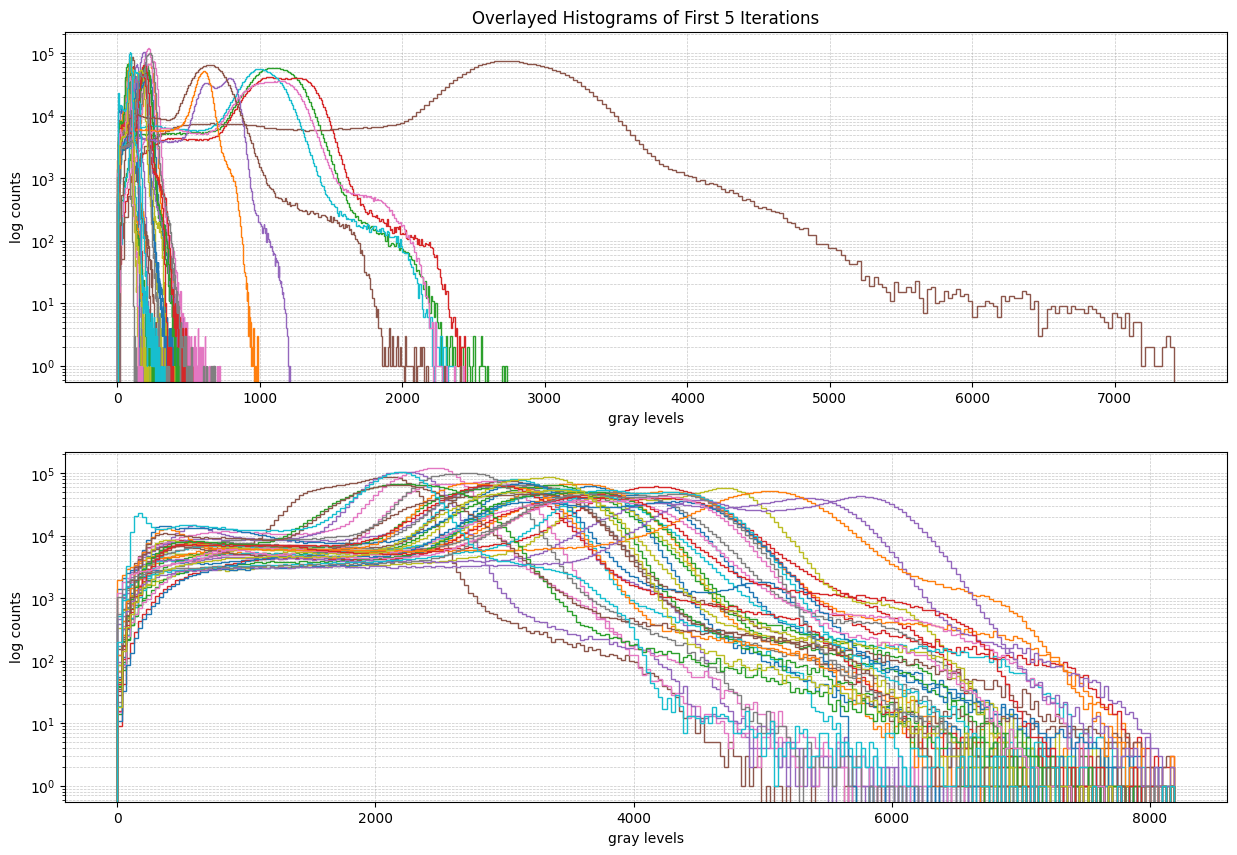

In [11]:
results_range = intensity_norm(imgs, mri_mod, pipeline, mask_str, Imin=0.0, Imax=levels, rescaling_method=rescaling_method, ID_level=-3)

In [7]:
#results_range= intensity_norm(imgs, mri_mod, rescaling_method=rescaling_method)

# Set directories  N4 + resampling pipeline

In [ ]:
target_spacing = (0.8, 0.8, 0.8)
mri_data='MSSEG2'
subdir='preprocessed_cimalab'
time_point='time02'
mri_mod='FLAIR'
pipeline='_SkullS'
mask_str=''
root_path = '/app/Data/_Brain/Radiology/_Adult/_EM/'
_, imgs=getting_images_list(mri_data,subdir,time_point,mri_mod,pipeline,mask_str)
imgs

In [ ]:
#defining template images
time_point='time01'
mri_mod='FLAIR'
pipeline='_SkullS_BiasCorrect_rz'
mask_str=''
_, imgs2=getting_images_list(mri_data,subdir,time_point,mri_mod,pipeline,mask_str)
imgs2

In [ ]:
biasCorrect_img_list, resampled_img_list=N4Bias_resampling(imgs, target_spacing, template=imgs2)

In [ ]:
#biasCorrect_img_list
#resampled_img_list

# Multiple lesion

## set directories

In [ ]:
dataset='MSSEG2'
tm_pt1='01'
images_path_fixed=os.path.join('/app/Data/_Brain/Radiology/_Adult/_EM', dataset , 'preprocessed_cimalab/*','time'+ tm_pt1,'*FLAIR*_rz.nii*')
tm_pt2='01'
images_path_moving=os.path.join('/app/Data/_Brain/Radiology/_Adult/_EM', dataset , 'preprocessed_dg/*','*time*'+ tm_pt2,'*FLAIR_SkullS_*rz.nii*')

In [ ]:
fixed_im=glob.glob(images_path_fixed)
fixed_im=sorted(fixed_im)
print('fixed images list',len(fixed_im))

mov_images=glob.glob(images_path_moving)
mov_images=sorted(mov_images)
print('moving images',len(mov_images))
fixed_im
mov_images

In [ ]:
# Specify ANTs parameters
aff_metric = "mattes"
type_of_transform = "Affine"

ext = ".nii.gz"
ext_prealign = "_align.nii.gz"
ext_reg = "_reg.nii.gz"

In [ ]:
for im  in list(mov_images[1:]):
    id_label=os.path.basename(os.path.dirname(os.path.dirname(im)))
    j = [idx for idx, fname in enumerate(fixed_im) if id_label in fname][0]
    
    print('case ID........',id_label)
    print('moving image........',os.path.basename(im))
    print('reference image........',os.path.basename(fixed_im[j]))
    
#   # forward transformation
    outprefix = fixed_im[j]
    fixed_i = ants.image_read(fixed_im[j])

    moving_t1 = get_info_match_tp1(fixed_im[j],im,ext,ext_prealign) #match images in tp2
    print('moving_t1.....',moving_t1)
    omoving_t1 = moving_t1.replace(ext_prealign,ext_reg)
    print('omoving_t1 .........',omoving_t1,)
    moving_t1i = ants.image_read(moving_t1)
    mytx = ants.registration(fixed=fixed_i,moving=moving_t1i,type_of_transform=type_of_transform,outprefix=outprefix,aff_metric=aff_metric)
    mywarpedimage_t1 = ants.apply_transforms(fixed=fixed_i, moving=moving_t1i, transformlist=mytx['fwdtransforms'])
    ants.image_write(mywarpedimage_t1, omoving_t1)
    !rm $moving_t1

    seg_paths=os.path.join('/app/Data/_Brain/Radiology/_Adult/_EM', dataset ,'preprocessed_rz', id_label + '/time*'+ tm_pt2,id_label+'*segmentations','*nii.gz')
    seg_im=glob.glob(seg_paths)
    seg_im=sorted(seg_im)
    print('seg images list',len(seg_im))
    
    output_mask=os.path.join(os.path.dirname(outprefix),id_label+'_segmentations')
    print('output_mask......',output_mask)
    if os.path.exists(output_mask):
        print("Directory exists.")
    else:
        os.makedirs(output_mask)
        print("Directory created.")
        
    for seg in seg_im:
        print(seg)
        moving_segr = get_info_match_tp1_seg(fixed_im[j],seg,ext,ext_prealign) # check mask extension inside this function
        print('moving_segr.....',moving_segr)
        omoving_segr = moving_segr.replace(".nii.gz","_reg.nii.gz")
        print('omoving_segr.....',omoving_segr)
        moving_segri = ants.image_read(moving_segr)
        mywarpedimage_seg = ants.apply_transforms(fixed=fixed_i, moving=moving_segri, interpolator='nearestNeighbor',transformlist=mytx['fwdtransforms'])
        ants.image_write(mywarpedimage_seg, omoving_segr)
        !mv $omoving_segr $output_mask
        print('forward transformation completed.................................................')

In [ ]:
# seg_paths=os.path.join('/app/Data/_Brain/Radiology/_Adult/_EM', dataset ,'preprocessed_rz', id_label+ '/time*'+ tm_pt,id_label+'*mask','*nii.gz')
# print('seg_paths',seg_paths)
# seg_im=glob.glob(seg_paths)
# seg_im=sorted(seg_im)
# print('seg images list',len(seg_im))
# seg_im
seg_paths=os.path.join('/app/Data/_Brain/Radiology/_Adult/_EM', dataset ,'preprocessed_rz', id_label+ '/time*'+ tm_pt2,id_label+'*mask','*nii.gz')
seg_paths